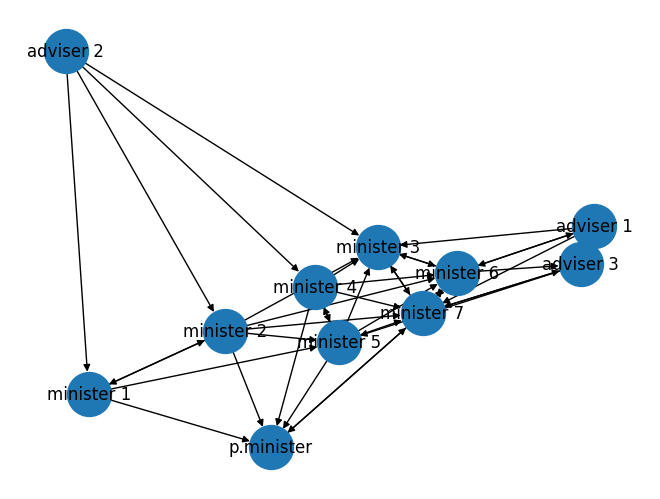

Modularity: 0.09651992861392028


In [1]:
# Load Tina.paj and plot the network

import networkx as nx
import matplotlib.pyplot as plt

# Load Tina.paj
G = nx.read_pajek("Tina_sub.paj", encoding="UTF-8")

# Plot the network
nx.draw(G, pos=nx.spectral_layout(G, scale=0.5),with_labels=True, node_size=1000)
plt.show()

# Compute modularity without the community module
# See https://en.wikipedia.org/wiki/Modularity_(networks)

# Compute the number of edges
m = G.number_of_edges()

# Compute the degree of each node
k = dict(G.degree())

# Compute the sum of the degrees
twom = sum(k.values())

# Compute the modularity
Q = 1.0/(2.0*m)*sum([G[i][j]['weight'] - k[i]*k[j]/twom \
                        for i,j in G.edges()])
print("Modularity:", Q)





# Task 2

In [2]:

import random
import numpy as np

def erdos_renyi_graph(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

# Count isolated nodes
def count_isolated_nodes(G):
    count = 0
    for node in G.nodes:
        if G.degree(node) == 0:
            count += 1
    return count

n = 10**4
plarge = 1.1*np.log(n)/n
psmall = 0.9*np.log(n)/n

# Generate a random Erdös-Rényi graph G(n, p)
large_no_isolated = 0
small_isolated = 0
for i in range(10):
    Glarge = erdos_renyi_graph(n, plarge)
    Gsmall = erdos_renyi_graph(n, psmall)
    if count_isolated_nodes(Glarge) == 0:
        large_no_isolated += 1
    if count_isolated_nodes(Gsmall) > 0:
        small_isolated += 1

# Print the results
print(f"Number of graphs with no isolated nodes p={plarge}:", large_no_isolated)
print(f"Number of graphs with isolated nodes p={psmall}:", small_isolated)







Number of graphs with no isolated nodes p=0.0010131374409173804: 6
Number of graphs with isolated nodes p=0.0008289306334778565: 9


0.1% of graphs having isolated nodes (i.e. are disconnected) for p < ln(n)/n and a mere 0.08% of graphs being disconnected for p > ln(n)/n.
With this its safe to say that Erdös-Rényi graphs are a.s. disconnected for p < ln(n)/n and vice versa. 

# Task 3

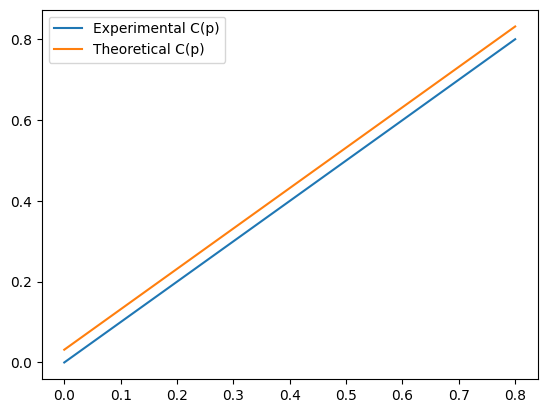

In [61]:



# Function to compute adjacency matrix
def adjacency_matrix(G):
    n = G.number_of_nodes()
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if G.has_edge(i, j):
                A[i, j] = 1
    return A


# Compute global clustering coefficient
def global_clustering_coefficient(A):
    CTriag = np.trace(A@A@A)
    GP2 = sum(sum(A@A)) - sum(np.diag(A@A))
    if GP2 == 0:
        return 0
    else: 
        return CTriag/GP2



def theoretical_C(n,p):
    return p+n**(-1/2)


n = 10**3
p = np.arange(0,1,0.2)
C = np.zeros(len(p))
for i in range(len(p)):
    Ctemp = 0
    for j in range(10):
        G = erdos_renyi_graph(n,p[i])
        A = adjacency_matrix(G)
        Ctemp += global_clustering_coefficient(A)
    C[i] = Ctemp/10


plt.plot(p,C,label='Experimental C(p)')
plt.plot(p,theoretical_C(n,p),label='Theoretical C(p)')
plt.legend();

We see that the experimental results are very close to the theoretical ones with only a constant offset, that decreases as n increases (just like we expect with the O(n^-1/2) term)